In [ ]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 35.1 MB/s eta 0:00:00


In [ ]:
import mysql.connector

In [ ]:
# Define the connection parameters
host = "localhost"
port = 3306
database = "corona_tested_006"
username = "root"
password = "Lalitha@01"

# Create a connection object
conn = mysql.connector.connect(host=host, port=port, database=database, user=user, password=password)

# Execute a SQL query

cursor = conn.cursor()
cursor.execute("SELECT * FROM patients")

# Print the results
for row in cursor:
    print(row)

# Close the connection
conn.close()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
corona = pd.read_csv('corona_tested_006.csv')
corona

<ipython-input-33-3210141cccbd>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  corona = pd.read_csv('corona_tested_006.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [ ]:
corona.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age', 'Sex',
       'Known_contact'],
      dtype='object')

In [34]:
corona.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


Data cleaning

In [35]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {corona.shape}")
totalrows=corona.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (278848, 11)
 Total number of rows in the dataset =  278848


In [36]:
# Checking Null colunms
file_nullcols = corona.isnull().sum()
file_nullcols

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age                    0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
# Checking data type of each colunm to check if any type needs to be changed
corona.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age                    object
Sex                    object
Known_contact          object
dtype: object

In [ ]:
# Checking basic details of the data
corona.describe()

,Ind_ID
count,14622.000000
mean,7311.500000
std,4221.152153
min,1.000000
25%,3656.250000
50%,7311.500000
75%,10966.750000
max,14622.000000


EDA

In [ ]:
print(corona.isnull().sum())


Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age                    0
Sex                    1
Known_contact          1
dtype: int64


In [79]:
corona.drop(corona[corona['Age'].isnull()].index,axis=0, inplace=True)

corona.drop(corona[corona['Sex'].isnull()].index,axis=0, inplace=True)

corona.drop(corona[corona['Known_contact'].isnull()].index,axis=0, inplace= True)

In [48]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Ind_ID               278848 non-null  int64  
 1   Test_date            278848 non-null  object 
 2   Cough_symptoms       130820 non-null  float64
 3   Fever                130820 non-null  float64
 4   Sore_throat          65535 non-null   float64
 5   Shortness_of_breath  65535 non-null   float64
 6   Headache             65535 non-null   float64
 7   Corona               278848 non-null  object 
 8   Age                  278848 non-null  object 
 9   Sex                  278848 non-null  object 
 10  Known_contact        278848 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 23.4+ MB


In [37]:
# Explore the distribution of the target variable 'Corona_result'
print(corona['Corona'].value_counts())

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64


**Before dealing with missing values we have to encode all categorial data**

In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [39]:
# Assuming corona is your DataFrame
corona_encoded = pd.get_dummies(corona, columns=['Sex', 'Corona'], drop_first=True)


In [40]:
corona.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [54]:
#encoding the cough-syotoms
corona['Cough_symptoms'] = corona.Cough_symptoms.map({'TRUE': 0, 'FALSE':1})
#encoding the fever
corona['Fever'] = corona.Fever.map({'TRUE': 0, 'FALSE':1})
#encoding the sore_throat
corona['Sore_throat'] = corona.Sore_throat.map({'TRUE' : 0, 'FALSE':1})
#encoding the Shortnesss of breath
corona['Shortness_of_breath'] = corona.Shortness_of_breath.map({'TRUE' : 0, 'FALSE':1})
#encoding the headache
corona['Headache'] = corona.Headache.map({'TRUE' : 0, 'FALSE':1})
#encoding the corona
corona['Corona'] = corona.Corona.map({'negative' :0,'positive' :1})

In [55]:
corona

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age,Sex,Known_contact
0,1,11-03-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,None,Abroad
1,2,11-03-2020,NaN,NaN,NaN,NaN,NaN,1.0,None,None,Abroad
2,3,11-03-2020,NaN,NaN,NaN,NaN,NaN,1.0,None,None,Abroad
3,4,11-03-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,None,Abroad
4,5,11-03-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,NaN,NaN,NaN,NaN,NaN,1.0,None,male,Other
278844,278845,30-04-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,female,Other
278845,278846,30-04-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,male,Other
278846,278847,30-04-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,male,Other


In [ ]:
positive_cases = corona[corona['Corona'] == 'positive']
symptoms_distribution = positive_cases[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']].sum()
print(symptoms_distribution)

Cough_symptoms         5373.0
Fever                  5807.0
Sore_throat            4786.0
Shortness_of_breath    4920.0
Headache               4356.0
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

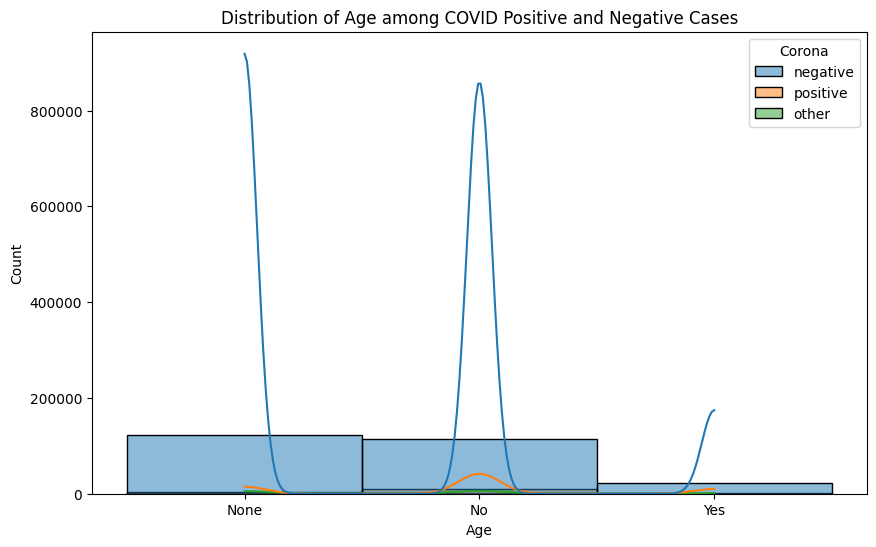

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=corona, x='Age', hue='Corona', kde=True, bins=30)
plt.title('Distribution of Age among COVID Positive and Negative Cases')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-21-bd0fa713e79a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = corona.corr()


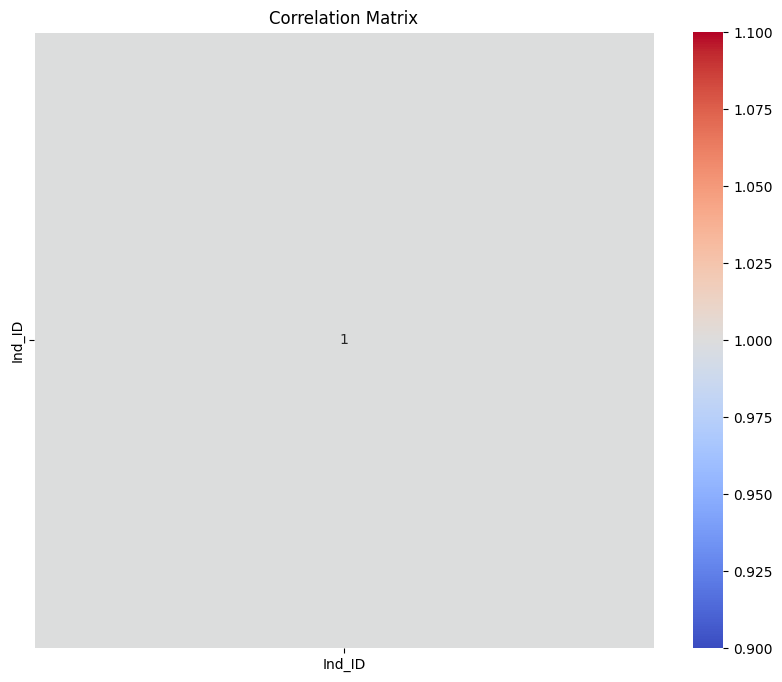

In [ ]:
correlation_matrix = corona.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
!pip install fancyimpute

In [17]:
from fancyimpute import KNN # importing KNN library
knn_imputer = KNN() # calling KNN function
corona_knn = corona.copy(deep=True) # creating copy



**Outliers**

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import figure
import plotly.express as px

In [56]:
corona

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age,Sex,Known_contact
0,1,11-03-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,None,Abroad
1,2,11-03-2020,NaN,NaN,NaN,NaN,NaN,1.0,None,None,Abroad
2,3,11-03-2020,NaN,NaN,NaN,NaN,NaN,1.0,None,None,Abroad
3,4,11-03-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,None,Abroad
4,5,11-03-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,NaN,NaN,NaN,NaN,NaN,1.0,None,male,Other
278844,278845,30-04-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,female,Other
278845,278846,30-04-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,male,Other
278846,278847,30-04-2020,NaN,NaN,NaN,NaN,NaN,0.0,None,male,Other


In [57]:
# Here I am using IQR to remove outliers. I have already checked Z score and did not work well
# IQR for price column
Q1 = corona['Ind_ID'].quantile(0.25)
Q3 = corona['Ind_ID'].quantile(0.75)
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

209136.25 69712.75
139423.5
418271.5
-139422.5


In [58]:
corona_miss= corona[corona.Ind_ID < upper_bound]
corona_miss = corona_miss[corona.Ind_ID > lower_bound]
corona_miss.shape

(278848, 11)

<Axes: xlabel='Ind_ID', ylabel='Count'>

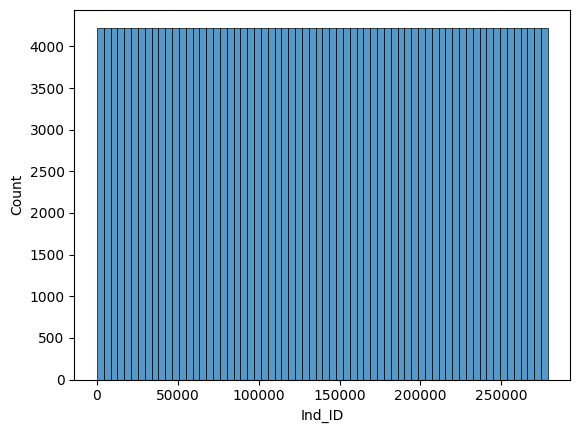

In [59]:
sns.histplot(corona_miss['Ind_ID'])

<Axes: xlabel='Corona', ylabel='Count'>

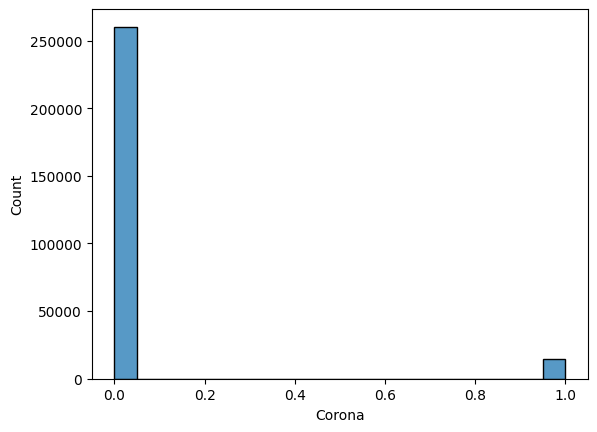

In [60]:
sns.histplot(corona_miss['Corona']) # examining distribution of area column

**Linear regression**

In [61]:
x = corona[['Ind_ID','Corona']]

In [62]:
y = corona.Ind_ID

In [68]:
from sklearn.model_selection import train_test_split # importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101) #25% is test and 75% is training

In [69]:
from sklearn.preprocessing import StandardScaler # performing standardization technique
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[ 0.69167392, -0.237453  ],
       [ 0.3163679 , -0.237453  ],
       [ 0.64082497, -0.237453  ],
       ...,
       [ 0.80924505, -0.237453  ],
       [ 0.93251712, -0.237453  ],
       [ 0.46615744, -0.237453  ]])

In [65]:
X_test=sc.transform(X_test)
X_test

array([[ 1.65909577, -0.237453  ],
       [-0.43962217, -0.237453  ],
       [-1.18592435, -0.237453  ],
       ...,
       [-1.30566904, -0.237453  ],
       [-0.66443068, -0.237453  ],
       [-0.54720733, -0.237453  ]])

In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [71]:
# fitting linear regression model
lm = LinearRegression()

**Random forest classifier**

In [75]:
x= corona.iloc[:, [2,3]].values
y= corona.iloc[:, 3].values

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [77]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values